# Tsiky Tafita RAKOTOHERISOA - Data Driven Optimization

### Useful librairies

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow

### 2. Given the function

$$
f(x) = 100(x_2 - x_1^2) + (1 - x_1)^2
$$



In [123]:
# Define the function
def func(x1, x2):
  """
  This function computes the function f(x) = 100(x2 - x1^2) + (1 - x1)^2
  Parameters: x1, x2
  Returns: f(x1, x2)
  """
  return 100*(x2 - x1**2) + (1 - x1)**2

**2.a) Generating 3D plot of the function using matplotlib**

In [124]:
# create a grid of x1, x2 values

x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = func(X1, X2)

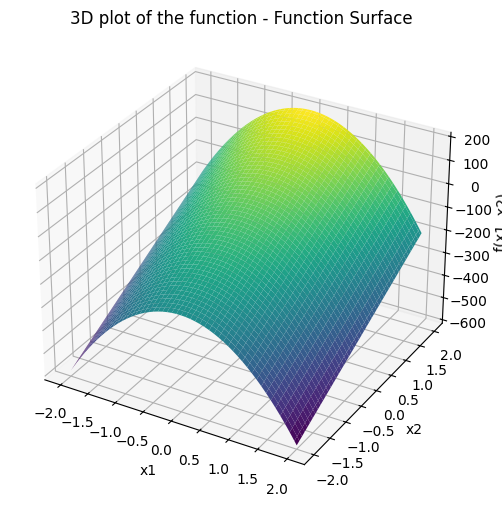

In [125]:
# create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#plot the surfaces
ax.plot_surface(X1, X2, Z, cmap='viridis')

#labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('3D plot of the function - Function Surface')

plt.show()

**2.b) A contour plot of f**

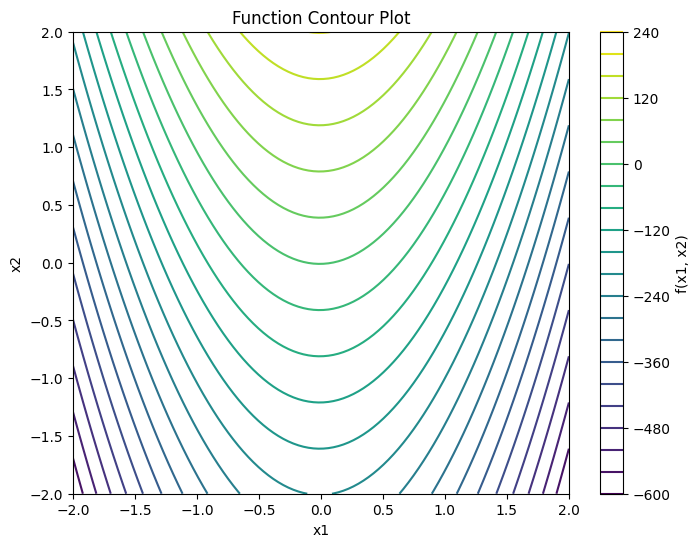

In [126]:
# create a contour plot

plt.figure(figsize=(8, 6))
plt.contour(X1, X2, Z, levels=20, cmap='viridis')
plt.colorbar(label='f(x1, x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Function Contour Plot')
plt.show()

**2.c) The gradient of f(x) using Autograd under Pytorch.**



The gradient of $f(x)$ is given by:

$$
\nabla f(x) =
\begin{bmatrix}
\frac{\partial f(x)}{\partial x_1} \\
\frac{\partial f(x)}{\partial x_2}
\end{bmatrix}
$$
$$
\nabla f(x) = \begin{bmatrix}
    -198x_1 - 2\\
    100
\end{bmatrix}
$$

In [127]:
# Function to compute the gradient
def compute_gradient(x1, x2):
    """
    This function computes the gradient of the function f(x) = 100(x2 - x1^2) + (1 - x1)^2
    Parameters: x1, x2, PyTorch tensor
    Returns:  tuple(torch.Tensor, torch.Tensor)
        A tuple containing the gradients (df/dx1, df/dx2)
    """
    # Compute function output
    y = func(x1, x2)

    # Compute gradients df/dx1 and df/dx2
    grad = torch.autograd.grad(y, (x1, x2))

    return grad  # Returns tuple (df/dx1, df/dx2)


**2.d) The gradient at the point x = (1, 1)**

In [128]:
# Define input variables with requires_grad=True
x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(1.0, requires_grad=True)

# Compute gradients
grad_x1, grad_x2 = compute_gradient(x1, x2)

In [129]:
print("Gradient at x = (1, 1):")
print("df/dx1 =", grad_x1.item())
print("df/dx2 =", grad_x2.item())

Gradient at x = (1, 1):
df/dx1 = -200.0
df/dx2 = 100.0


### 3. We will use Python Opencv library to perform the following tasks

**3.a) Convert the colored image into a gray-level image**

In [130]:
# Loading image
image = cv2.imread("/content/Timbuktu.jpg")

# convert image to grayscale using opencv
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Save the grayscale image
cv2.imwrite("grayscale_image.jpg", gray)

True

**Original colored image**

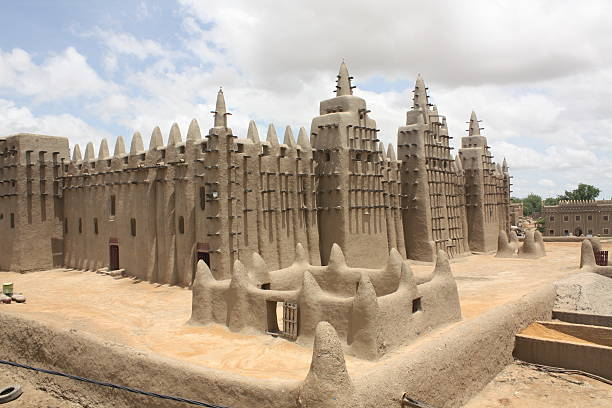

In [131]:
# Show original image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Gray-scale image**

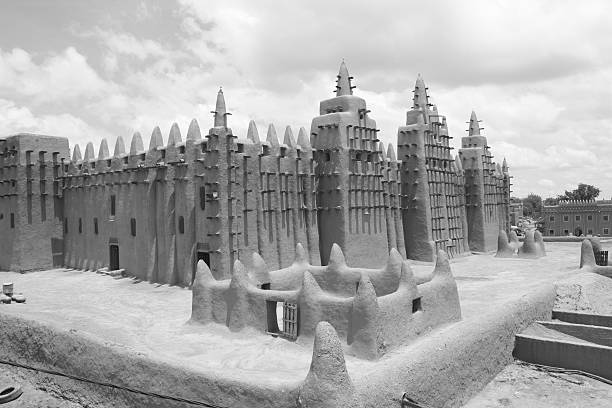

In [132]:

# Show the gray scale image
cv2_imshow(gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

**3.b) Read the grey-level values from 3.a) into a matrix**

In [133]:
# Load the image in grayscale mode (0 for grayscale)
image = cv2.imread("/content/grayscale_image.jpg", cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Error loading image")
else:
    # The image is now a matrix of grayscale values
    print("Matrix of grayscale values:")
    print(image)  # This will print the matrix (array of pixel values)


    # Save matrix as a text file:
    np.savetxt("grayscale_matrix.txt", image, fmt="%d")


Matrix of grayscale values:
[[177 177 177 ... 243 243 243]
 [177 177 177 ... 243 243 243]
 [177 177 177 ... 244 244 244]
 ...
 [163 155 153 ... 197 199 199]
 [190 195 186 ... 194 196 197]
 [159 165 159 ... 192 195 195]]


**3.c) Determine the SVD of the matrix in 3.b)**

**Determine SVD and display the singular values**

The SVD of a matrix $ A $ of size $ m \times n $ is represented as:

$$
A = U S V^T
$$

Where
- **$U$** is an $m \times m$ orthogonal square matrix.
- **$S$** is an $m \times n$ diagonal matrix with singular values in the diagonal.
- **$V^T$** is an $n \times n$ orthogonal square matrix.

In [134]:
# Load grayscale image as a matrix
image = cv2.imread("/content/grayscale_image.jpg", cv2.IMREAD_GRAYSCALE)
A = np.array(image, dtype=np.float32)  # Convert to float

# Compute the Singular Value Decomposition
U, S, Vt = np.linalg.svd(A, full_matrices=True)

# Display the singular values
print("Singular values:", S)


Singular values: [8.66879922e+04 1.01865586e+04 7.76315186e+03 4.70898584e+03
 4.32018457e+03 3.67672949e+03 3.25918481e+03 3.09757007e+03
 2.94459180e+03 2.51559155e+03 2.28642822e+03 2.21032227e+03
 2.13820874e+03 1.86550854e+03 1.82065161e+03 1.76851465e+03
 1.66378186e+03 1.60403357e+03 1.57862781e+03 1.49782043e+03
 1.44661011e+03 1.41796655e+03 1.39993372e+03 1.30827527e+03
 1.26149719e+03 1.22927209e+03 1.17309888e+03 1.16447937e+03
 1.13728748e+03 1.11308948e+03 1.10428735e+03 1.05676135e+03
 1.04581628e+03 1.01453265e+03 9.92233582e+02 9.81498840e+02
 9.68903687e+02 9.51773682e+02 9.30429016e+02 9.01099854e+02
 8.99388123e+02 8.86228210e+02 8.82608215e+02 8.73416931e+02
 8.49814941e+02 8.40365234e+02 8.27941711e+02 8.22025269e+02
 8.09354187e+02 7.96904175e+02 7.93323975e+02 7.81202271e+02
 7.66869629e+02 7.61000793e+02 7.50003113e+02 7.31303101e+02
 7.26139160e+02 7.17460144e+02 7.10406799e+02 7.02267090e+02
 6.88316467e+02 6.80866943e+02 6.76017212e+02 6.67891479e+02
 6.5935

**Result shape of the U, S and Vt**

In [135]:
print(f"U shape: {U.shape}")
print(f"S shape: {S.shape}")
print(f"Vt shape: {Vt.shape}")


U shape: (408, 408)
S shape: (408,)
Vt shape: (612, 612)


**Store the singular values in a matrix**

In [136]:
S_matrix = np.zeros_like(A)
np.fill_diagonal(S_matrix, S)  # Store singular values on the diagonal

print("Singular Values Matrix:\n", S_matrix)


Singular Values Matrix:
 [[86687.99      0.        0.    ...     0.        0.        0.   ]
 [    0.    10186.559     0.    ...     0.        0.        0.   ]
 [    0.        0.     7763.152 ...     0.        0.        0.   ]
 ...
 [    0.        0.        0.    ...     0.        0.        0.   ]
 [    0.        0.        0.    ...     0.        0.        0.   ]
 [    0.        0.        0.    ...     0.        0.        0.   ]]


**3.d) Compress the image by i) 25%, ii) 50%, iii)75%**

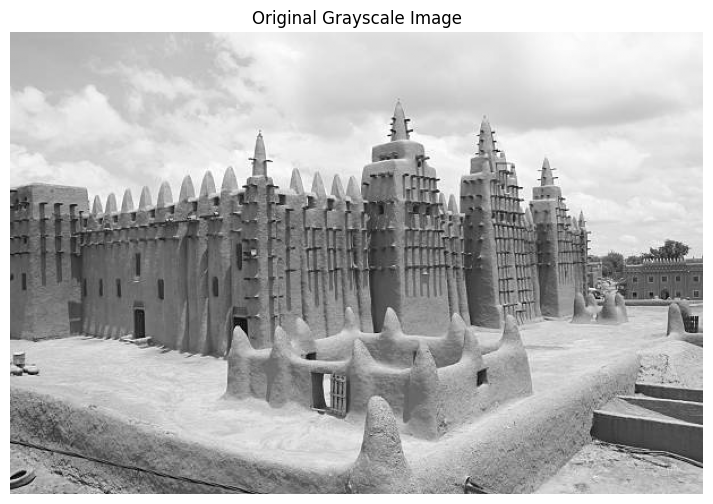

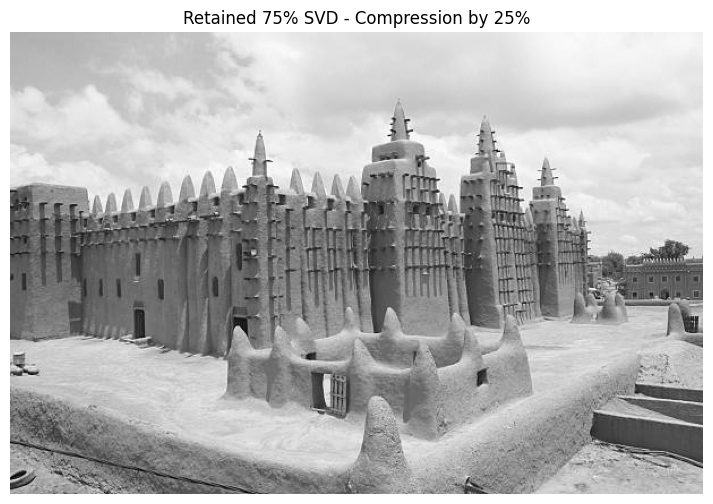

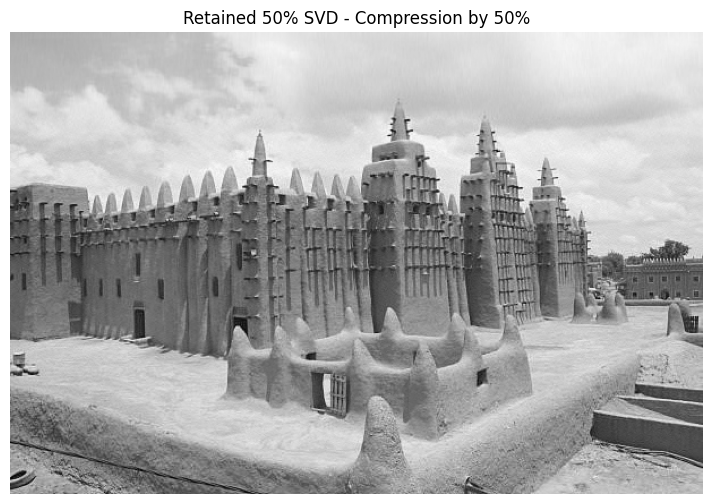

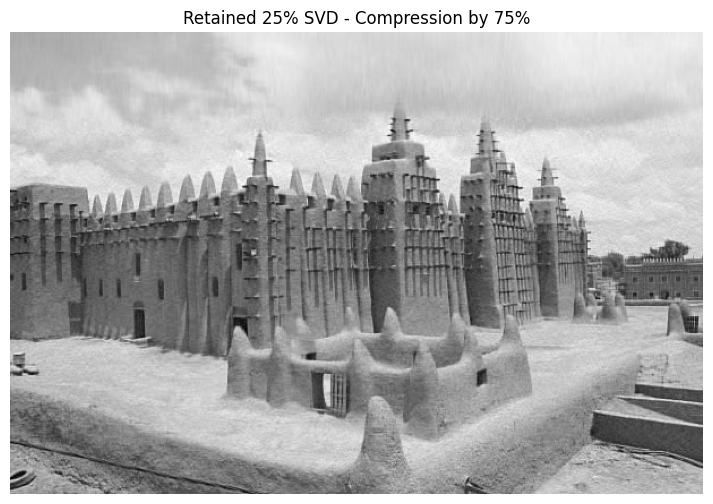

Singular values stored in 'singular_values_matrix.txt'


In [137]:
# Load the grayscale image
image = cv2.imread("/content/grayscale_image.jpg", cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Error loading image")
else:
    # Compute SVD
    U, S, Vt = np.linalg.svd(image, full_matrices=False)

    # Get the total number of singular values
    total_singular_values = len(S)

    # Compression percentages
    compression_ratios = [0.75, 0.50, 0.25]  # Retaining 75%, 50%, 25% singular values
    k_values = [int(r * total_singular_values) for r in compression_ratios]  # Compute k values

    # Store singular values in a matrix (as a diagonal matrix)
    singular_values_matrix = np.diag(S)

    # Save singular values matrix
    np.savetxt("singular_values_matrix.txt", singular_values_matrix, fmt="%.6f")

    # Display original image in a separate window
    plt.figure()
    plt.imshow(image, cmap="gray")
    plt.title("Original Grayscale Image")
    plt.axis("off")
    plt.show()

    # Display reconstructed images in separate windows
    for i, k in enumerate(k_values):
        # Reconstruct image using k singular values
        image_approx = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))

        # Show each reconstructed image in a new window
        plt.figure()
        plt.imshow(image_approx, cmap="gray")
        plt.title(f"Retained {compression_ratios[i]*100:.0f}% SVD - Compression by {100 - compression_ratios[i]*100:.0f}%")
        plt.axis("off")
        plt.show()

    print("Singular values stored in 'singular_values_matrix.txt'")


### **Comparison of reconstructed images at Different compression levels:**

- As we output the compressed images for different singular values we can notice difference in all the images with different K-values.

- We used three levels of compression: 25%, 50%, 75%.

- In the first level, the image is compressed by 25% and it is noticeable that the image is not very clear as the original.

- For the compression by 50%, the image is not clear than the previous.

- Thirdly, compression by 75%, we can notice a slight blur in the image.


In conclusion, Singular Value Decomposition (SVD) is a powerful method for compressing images that helps to keep most of the important visual information while reducing image size.

### 4. Useful dataset: vehicle.csv

**4.a) Upload the dataset**

- Upload the dataset using pandas.
- Read the dataset using only the first 5 lines.

In [138]:
dataset = pd.read_csv("/content/vehicle.csv")
dataset.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


**4.b) Perform the principal component analysis of the dataset**

- Principal Component Analysis (PCA) is used to reduce the dimensionality of a data set by finding a new set of variables, smaller than the original set of variables, retaining most of the sample’s information, and useful for the regression and classification of data.

In [139]:
# Counting the nan values in the dataset
dataset.isna().sum()

,0
compactness,0
circularity,5
distance_circularity,4
radius_ratio,6
pr.axis_aspect_ratio,2
max.length_aspect_ratio,0
scatter_ratio,1
elongatedness,1
pr.axis_rectangularity,3
max.length_rectangularity,0


In [140]:
# Drop the class column

dataset = dataset.drop(columns=["class"])

In [141]:
# Fill the NaN values using the mean

data = dataset.fillna(dataset.mean())

In [142]:
data.shape

(846, 18)

**Standardize the data**

- First, we need to standardize our dataset to ensure that each variable has a mean of 0 and a standard deviation of 1.

In [143]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the dataset (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)


**Apply PCA**

- Here we  consider the number of principal components of any value of our choice or by limiting the explained variance. Here I am considering explained variance equal to 95%.

In [144]:
# Perform PCA
#95% of variance

pca = PCA(n_components = 0.95)
pca.fit(X_scaled)
reduced = pca.transform(X_scaled)



# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

print(f"The shape of the reduced features is {reduced.shape}")

Explained Variance Ratio: [0.52206485 0.16736054 0.10562382 0.0654932  0.05089389 0.02992458
 0.01989681]
The shape of the reduced features is (846, 7)


- The number of principal component that explain 95% of the variance is: **7**  

**Visualization of the reduced dimension in 2D**

<ipython-input-145-49c4424b5ac4>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='plasma', alpha=0.5)


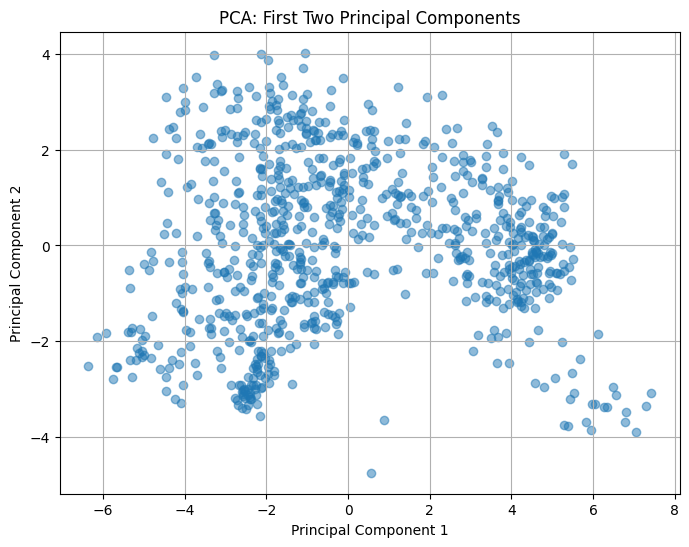

In [145]:
# Scatter plot of the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='plasma', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: First Two Principal Components")
plt.grid()
plt.show()


**4.c) What are the principal components?**

- Principal components represent the directions in which the data varies the most. The first few components typically capture the majority of the data’s variance, allowing for a more concise representation.

In [146]:
# components
principal_components = pca.components_
print("Principal Components:\n", principal_components)

Principal Components:
 [[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [ 1.27010856e-01 -1.26217125e-01  7.26862818e-02  1.89635192e-01
   1.22158741e-01 -1.07277825e-02 -4.80473095e-02 -1.27991503e-02
  -6.00351423e-02 -1.16182501e-01 -6.17536908e-02 -5.32757796e-02
  -2.09279660e-01 -4.88541866e-01  5.49212020e-02  1.24152855e-01
   5.40947666e-01  5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [-7.83109159e-02 -1.87525528e-01  7.07959698e-02  4.22567515e-02
  -3.28577853e